# Data Analytics Project: Enhancing Marketing Strategy for Sprocket Central Ltd
---

*An Exploration by the KPMG Analytics Team*

## Introduction

In this project, we delve into the realm of data analytics to derive valuable insights and develop a strategic approach for optimizing the marketing efforts of Sprocket Central Ltd. Our journey involves a comprehensive analysis of the provided dataset and encompasses key stages including data exploration, model development, and interpretation.

## Methodology and Process

Our analytical journey can be broken down into three core components, each contributing to our ultimate goal of refining the marketing strategy:

### 1. Data Exploration
We embark on a meticulous exploration of the dataset from Sprocket Central. This phase involves data cleansing, transformation, and visualization. Our aim is to gain a profound understanding of the data, uncover trends, and identify potential patterns that can inform our strategic recommendations.

### 2. Model Development
Central to our project is the utilization of the RFM (Recency, Frequency, Monetary) model development approach. RFM analysis is a powerful method that enables us to segment customers based on their purchase behavior, allowing us to identify high-value segments and tailor our marketing strategy accordingly. The RFM model, often employed in various industries, provides a structured framework for understanding customer engagement and prioritizing actions.

### 3. Interpretation
The insights derived from our data exploration and the outcomes of the RFM model form the bedrock of our interpretation phase. We translate the analytical results into actionable recommendations for Sprocket Central's marketing strategy. Our interpretations are driven by a deep understanding of customer demographics and attributes, guiding us towards effective targeting and engagement strategies.

## Data Source

The foundation of our analysis is the dataset generously provided by Sprocket Central. This dataset serves as a goldmine of information, enabling us to extract meaningful insights that drive strategic decision-making.

## Project Objective

Our overarching objective is twofold:
1. **Data Insights**: Unearth hidden patterns, trends, and customer behaviors within the dataset to inform targeted marketing initiatives.
2. **High-Value Customer Targeting**: Utilize the RFM model to identify and prioritize high-value customer segments, enabling Sprocket Central to optimize resource allocation and engagement strategies.

## The Significance of RFM Model

The RFM model, a widely adopted analytical technique, holds immense value in the world of data-driven marketing. It serves as a robust framework for customer segmentation by evaluating three key dimensions:
- **Recency**: How recently a customer made a purchase.
- **Frequency**: How often a customer makes purchases.
- **Monetary**: How much money a customer spends on purchases.

This model provides a structured approach to understanding customer behavior and categorizing customers into segments with varying levels of engagement and value. By leveraging the RFM model, we can effectively tailor marketing strategies to cater to the unique needs and behaviors of different customer segments.

In conclusion, our data analytics project employs a holistic approach, encompassing data exploration, RFM model development, and strategic interpretation. By delving into the dataset from Sprocket Central and leveraging the power of the RFM model, we aim to empower Sprocket Central Ltd with data-driven insights to enhance their marketing strategy and achieve impactful results.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import datetime as dt

from sklearn.metrics import confusion_matrix
import sklearn.metrics as met
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
import sklearn.feature_selection as fs
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.utils import resample
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')
path = '/content/gdrive/MyDrive/Colab Notebooks/KPMG_VI_New_raw_data_update_final.xlsx'


Mounted at /content/gdrive


# Customer Demographic

In [ ]:
sheet = 'CustomerDemographic'
df_cust_demo = pd.read_excel(path, sheet_name=sheet,
                             index_col=0)

<ipython-input-3-5fc07792d7f9>:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_cust_demo = pd.read_excel(path, sheet_name=sheet,


In [ ]:
df_cust_demo.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [ ]:
print('data shape:',df_cust_demo.shape)
print('='*100)
print('rows:', df_cust_demo.shape[0], '\nand columns:', df_cust_demo.shape[1])
print('='*100)
print('data columns', df_cust_demo.columns)

data shape: (4000, 12)
rows: 4000 
and columns: 12
data columns Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')


In [ ]:
df_cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           4000 non-null   object        
 1   last_name                            3875 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   job_title                            3494 non-null   object        
 6   job_industry_category                3344 non-null   object        
 7   wealth_segment                       4000 non-null   object        
 8   deceased_indicator                   4000 non-null   object        
 9   default                              3698 non-null   object        
 10  owns_car    

In [ ]:
print('number of data duplication is:', df_cust_demo.duplicated().sum())

number of data duplication is: 0


In [ ]:
nan_values= df_cust_demo.isna().sum().values
nan_values

array([  0, 125,   0,   0,  87, 506, 656,   0,   0, 302,   0,  87])

## NaN columns

In [ ]:
nan_col = list(df_cust_demo.columns[[1, 4,5,6, 9,11]])

print('List of NaN values columns:',nan_col)
print()
print('total NaN columns', len(nan_col))

List of NaN values columns: ['last_name', 'DOB', 'job_title', 'job_industry_category', 'default', 'tenure']

total NaN columns 6


In [ ]:
df_cust_demo[nan_col]

,last_name,DOB,job_title,job_industry_category,default,tenure
customer_id,,,,,,
1,Medendorp,1953-10-12,Executive Secretary,Health,"""'",11.0
2,Bockman,1980-12-16,Administrative Officer,Financial Services,<script>alert('hi')</script>,16.0
3,Dearle,1954-01-20,Recruiting Manager,Property,2018-02-01 00:00:00,15.0
4,NaN,1961-10-03,NaN,IT,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,7.0
5,Calton,1977-05-13,Senior Editor,NaN,NIL,8.0
...,...,...,...,...,...,...
3996,Halgarth,1975-08-09,VP Product Management,Health,-100,19.0
3997,Nisuis,2001-07-13,Statistician II,Manufacturing,â¦testâ§,1.0
3998,Woolley,NaT,Assistant Manager,IT,NaN,NaN


In [ ]:
for i in nan_col:
    all_value_counts = df_cust_demo[i].value_counts()
    print('Column\'s name:', i)
    print(all_value_counts)
    print('='*60)
    print()


Column's name: last_name
Pristnor     3
Ramsdell     3
Eager        2
Zisneros     2
Dredge       2
            ..
Whittock     1
Carwithen    1
Blas         1
Dearlove     1
Oldland      1
Name: last_name, Length: 3725, dtype: int64

Column's name: DOB
1978-01-30    7
1964-07-08    4
1962-12-17    4
1978-08-19    4
1977-05-13    4
             ..
1989-06-16    1
1998-09-30    1
1985-03-11    1
1989-10-23    1
1991-11-05    1
Name: DOB, Length: 3448, dtype: int64

Column's name: job_title
Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dty

In [ ]:
df_cust_demo = df_cust_demo.drop(['first_name', 'last_name', 'default', 'job_title', ],
                                 axis=1)

## Gender

In [ ]:
lis_gender = ['Female', 'Male']

gender_mapping= {'F': 'Female',
                 'Femal': 'Female',
                 'M': 'Male',
                 'U': 'Unknown'}

df_cust_demo['gender'] = df_cust_demo['gender'].replace(gender_mapping)

In [ ]:
df_cust_demo.gender.unique()

array(['Female', 'Male', 'Unknown'], dtype=object)

## Deceased Indicator

In [ ]:
df_cust_demo['deceased_indicator'].replace(['N'], 0, inplace=True)
df_cust_demo['deceased_indicator'].replace(['Y'], 1, inplace=False)

customer_id
1       0
2       0
3       0
4       0
5       0
       ..
3996    0
3997    0
3998    0
3999    0
4000    0
Name: deceased_indicator, Length: 4000, dtype: int64

In [ ]:
df_cust_demo[df_cust_demo['deceased_indicator'] ==0]
df_cust_demo = df_cust_demo.drop(['deceased_indicator'], axis=1)

## Owns Car

In [ ]:
df_cust_demo.owns_car.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df_cust_demo['owns_car'].replace('Yes', 1, inplace=True)
df_cust_demo['owns_car'].replace('No', 0, inplace=True)

## DOB / Date of Birth

In [ ]:
df_cust_demo.DOB.isna().sum()

87

In [ ]:
df_cust_demo = df_cust_demo[df_cust_demo['DOB'] != df_cust_demo.DOB.min()]

## Clean data

In [ ]:
df_clean = df_cust_demo.dropna()
df_clean.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
customer_id,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,1,11.0
2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0
3,Male,61,1954-01-20,Property,Mass Customer,1,15.0
4,Male,33,1961-10-03,IT,Mass Customer,0,7.0
6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3256 entries, 1 to 3999
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   gender                               3256 non-null   object        
 1   past_3_years_bike_related_purchases  3256 non-null   int64         
 2   DOB                                  3256 non-null   datetime64[ns]
 3   job_industry_category                3256 non-null   object        
 4   wealth_segment                       3256 non-null   object        
 5   owns_car                             3256 non-null   int64         
 6   tenure                               3256 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 203.5+ KB


## Data Preprocessing

In [ ]:
time_now = dt.datetime.now()

df_clean['age'] = (time_now - df_clean['DOB']) / np.timedelta64(1, 'Y')
df_clean['age_class'] = ((round(df_clean['age'] /10)) *10).astype(int)

<ipython-input-23-78e8d8fd803a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['age'] = (time_now - df_clean['DOB']) / np.timedelta64(1, 'Y')
<ipython-input-23-78e8d8fd803a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['age_class'] = ((round(df_clean['age'] /10)) *10).astype(int)


In [ ]:
df_clean.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class
customer_id,,,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,69.678635,70
2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,42.499432,40
3,Male,61,1954-01-20,Property,Mass Customer,1,15.0,69.404844,70
4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,61.703112,60
6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,56.750238,60


# Customer Address

In [ ]:
df_addr = pd.read_excel(path,
                        sheet_name='CustomerAddress', index_col=0)
df_addr.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


## State

In [ ]:
df_addr['state'].replace('New South Wales', 'NSW', inplace=True)
df_addr['state'].replace('Victoria', 'VIC', inplace=True)


In [ ]:
df_clean_addr = df_addr.dropna()
df_clean.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class
customer_id,,,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,69.678635,70
2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,42.499432,40
3,Male,61,1954-01-20,Property,Mass Customer,1,15.0,69.404844,70
4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,61.703112,60
6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,56.750238,60


In [ ]:
df_merge= pd.merge(df_clean, df_clean_addr, left_index=True, right_index=True)
df_merge = df_merge.dropna()

In [ ]:
df_merge.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,69.678635,70,060 Morning Avenue,2016,NSW,Australia,10
2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,42.499432,40,6 Meadow Vale Court,2153,NSW,Australia,10
4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,61.703112,60,0 Holy Cross Court,4211,QLD,Australia,9
6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,56.750238,60,9 Oakridge Court,3216,VIC,Australia,9
7,Female,6,1976-02-23,Financial Services,Affluent Customer,1,11.0,47.312672,50,4 Delaware Trail,2210,NSW,Australia,9


# Transaction

In [ ]:
df_trans = pd.read_excel(path, sheet_name='Transactions', index_col=0)
df_trans.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
df_trans = df_trans.sort_values('customer_id')
df_trans.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [ ]:
df_trans.isna().sum()

product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [ ]:
print('total data duplicated:', df_trans.duplicated().sum())

total data duplicated: 0


In [ ]:
df_trans.shape

(20000, 12)

In [ ]:
df_trans['product_first_sold_date'] = pd.TimedeltaIndex(df_trans['product_first_sold_date'],
                                                        unit='d') + dt.datetime(1900,1,1)
df_trans.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11


In [ ]:
df_trans_clean = df_trans.dropna()
df_trans.shape

(20000, 12)

In [ ]:
df_trans_clean['transaction_date'].describe(datetime_is_numeric=True)

count                            19445
mean     2017-07-01 16:21:18.189766144
min                2017-01-01 00:00:00
25%                2017-04-01 00:00:00
50%                2017-07-03 00:00:00
75%                2017-10-02 00:00:00
max                2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [ ]:
most_recent_purchase = df_trans_clean['transaction_date'].max()
df_trans_clean['last_purchase_days_ago'] = most_recent_purchase - df_trans_clean['transaction_date']
df_trans_clean['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
df_trans_clean['profit'] = df_trans_clean['list_price'] - df_trans_clean['standard_cost']
df_trans_clean.head()

<ipython-input-38-1b00165bb795>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans_clean['last_purchase_days_ago'] = most_recent_purchase - df_trans_clean['transaction_date']
<ipython-input-38-1b00165bb795>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans_clean['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
<ipython-input-38-1b00165bb795>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,last_purchase_days_ago,profit
transaction_id,,,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07,278.0,75.75
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11,276.0,509.97
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07,21.0,75.14
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23,233.0,189.28
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11,312.0,17.87


In [ ]:
df_trans_clean[df_trans_clean['last_purchase_days_ago'] > 365].shape

(0, 14)

## RFM Table

In [ ]:
rfm_Table = df_trans_clean.groupby('customer_id').agg(
    {
        'last_purchase_days_ago': lambda x: x.min(),
        'customer_id': lambda x: len(x),
        'profit': lambda x: x.sum()
    }
)

rfm_Table.rename(columns={
    'last_purchase_days_ago': 'recency',
    'customer_id': 'frequency',
    'profit': 'monetary_value'
}, inplace=True)

In [ ]:
rfm_Table.head()

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,7,3290.21
4,195.0,2,220.57
5,16.0,6,2394.94


In [ ]:
rfm_Table.shape

(3492, 3)

In [ ]:
quartiles = rfm_Table.quantile(q=[1/4, 1/2, 3/4])
quartiles.set_index([['Q1','Q2','Q3']])

,recency,frequency,monetary_value
Q1,18.0,4.0,1797.43
Q2,45.0,5.0,2798.99
Q3,88.0,7.0,4122.44


In [ ]:
# pemetaan / penilaian rfm scores 1-4 scale based on quartiles

def ROneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FMOneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 1

In [ ]:
rfmSeg = rfm_Table

rfmSeg['r_score'] = rfmSeg['recency'].apply(ROneHotEncoder, args=('recency', quartiles))
rfmSeg['f_score'] = rfmSeg['frequency'].apply(FMOneHotEncoder, args=('frequency', quartiles))
rfmSeg['m_score'] = rfmSeg['monetary_value'].apply(FMOneHotEncoder,
                                                   args=('monetary_value', quartiles))

rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
1,7.0,11,3018.09,1,1,3
2,128.0,3,2226.26,4,4,2
3,102.0,7,3290.21,4,3,3
4,195.0,2,220.57,4,4,4
5,16.0,6,2394.94,1,3,2


In [ ]:
rfmSeg['rfm_class'] = 100 * rfmSeg['r_score'] + 10 * rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg['total_score'] = rfmSeg['r_score'] + rfmSeg['f_score'] + rfmSeg['m_score']

rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5
2,128.0,3,2226.26,4,4,2,442,10
3,102.0,7,3290.21,4,3,3,433,10
4,195.0,2,220.57,4,4,4,444,12
5,16.0,6,2394.94,1,3,2,132,6


In [ ]:
rfm_quartiles = (rfmSeg['rfm_class'].min(), rfmSeg['rfm_class'].quantile(1/4),
                 rfmSeg['rfm_class'].quantile(0.5), rfmSeg['rfm_class'].quantile(3/4),
                 rfmSeg['rfm_class'].max())

rfm_quartiles

(111, 144.0, 244.0, 344.0, 444)

In [ ]:
def RFMClassOneHotEncoder(x, p,d):
  if x<= d[0]:
    return 'platinum'
  elif x <= d[1]:
    return 'gold'
  elif x <= d[2]:
    return 'silver'
  else:
    return 'bronze'


rfmSeg['customer_title'] = rfmSeg['rfm_class'].apply(RFMClassOneHotEncoder,
                                                     args=('rfm_class', rfm_quartiles))
rfmSeg

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title
customer_id,,,,,,,,,
1,7.0,11,3018.090000,1,1,3,113,5,gold
2,128.0,3,2226.260000,4,4,2,442,10,bronze
3,102.0,7,3290.210000,4,3,3,433,10,bronze
4,195.0,2,220.570000,4,4,4,444,12,bronze
5,16.0,6,2394.940000,1,3,2,132,6,gold
...,...,...,...,...,...,...,...,...,...
3497,52.0,3,1648.320000,3,4,4,344,11,bronze
3498,127.0,6,3147.330000,4,3,3,433,10,bronze
3499,51.0,7,4955.250000,3,3,1,331,7,bronze


In [ ]:
df_merge = pd.merge(rfmSeg, df_merge, left_index=True,
                    right_index=True)
df_merge.columns

Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'customer_title', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'age_class', 'address',
       'postcode', 'state', 'country', 'property_valuation'],
      dtype='object')

# Visualization

In [ ]:
df_merge.shape

(2850, 23)

<Axes: xlabel='r_score'>

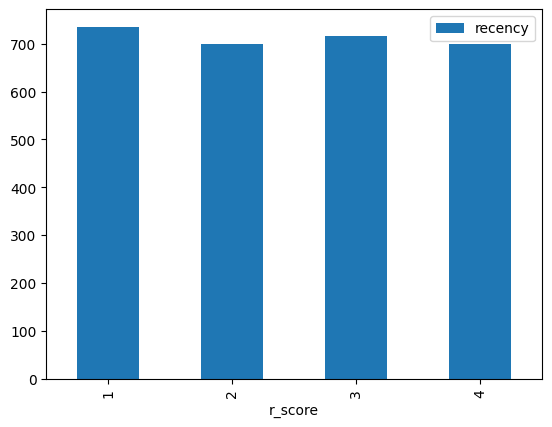

In [ ]:
df_merge.groupby('r_score').agg('recency').count().to_frame().plot(kind='bar')

<Axes: xlabel='total_score'>

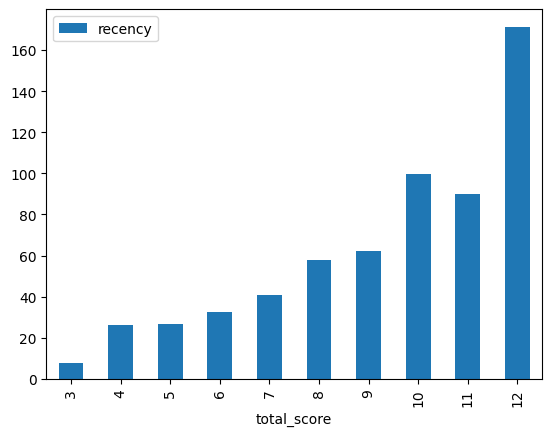

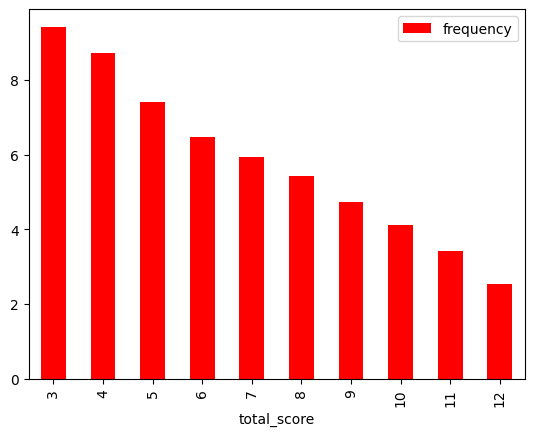

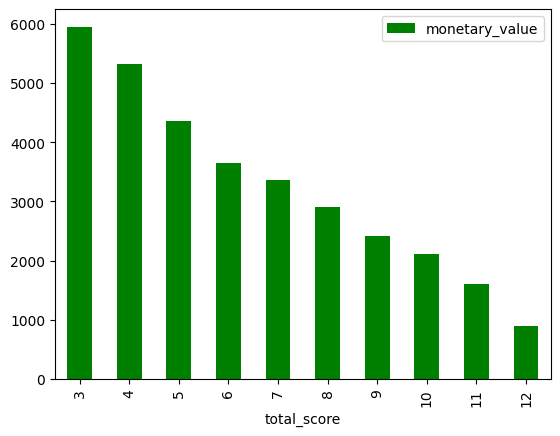

In [ ]:
df_merge.groupby('total_score').agg('recency').mean().to_frame().plot(kind='bar')
df_merge.groupby('total_score').agg('frequency').mean().to_frame().plot(kind='bar', color='red')
df_merge.groupby('total_score').agg('monetary_value').mean().to_frame().plot(kind='bar', color='green')

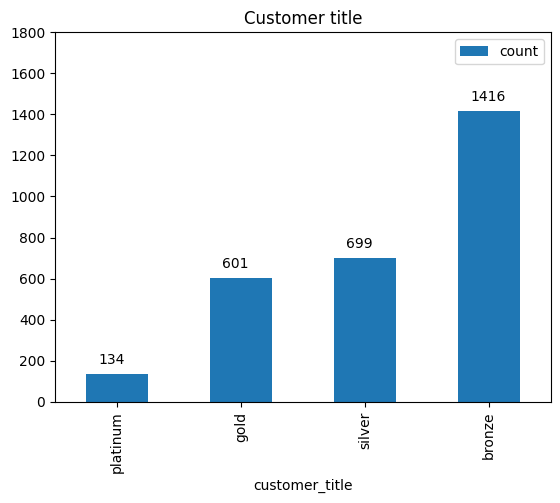

In [ ]:
df_customer_titles = df_merge.groupby('customer_title').agg(
    {
        'rfm_class': lambda x: len(x)
    }
)

df_customer_titles.rename(columns={'rfm_class': 'count'}, inplace=True)
df_customer_titles.sort_values('count').plot(kind='bar')

for i, v in enumerate(df_customer_titles.sort_values('count')['count']):
  plt.text(i - .15, v+50, int(v), color='black')

axes= plt.gca()
axes.set_ylim([0, 1800])
plt.title('Customer title')
plt.show()

Text(0.5, 1.0, 'Recency vs Avg Profit')

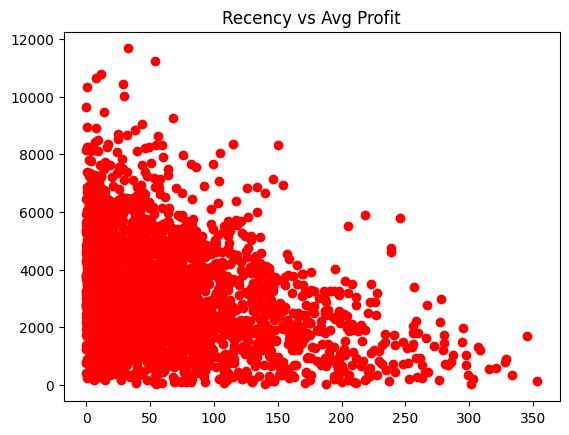

In [ ]:
plt.scatter(df_merge['recency'], df_merge['monetary_value'], color='red')
plt.title('Recency vs Avg Profit')

Text(0.5, 1.0, 'Wealth segment with Age Distribution')

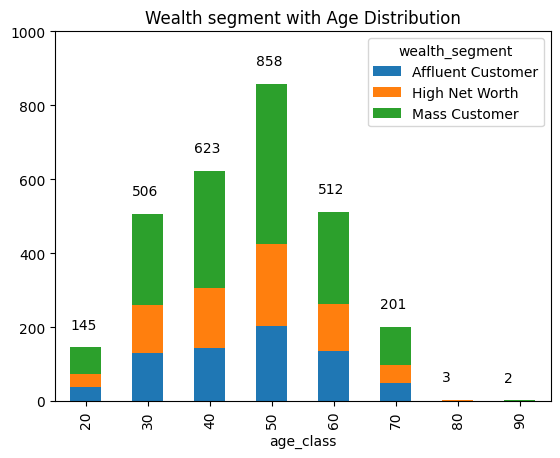

In [ ]:
# var = df_merge.groupby('age_class').agg({'wealth_segment': lambda x: len(x)})

df_merge.groupby('age_class')['wealth_segment'].value_counts().unstack(level=1).plot.bar(stacked=True)

for i ,v in enumerate(df_merge.groupby('age_class').agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
  plt.text(i-.25, v+50, int(v), color='black')

axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Wealth segment with Age Distribution')

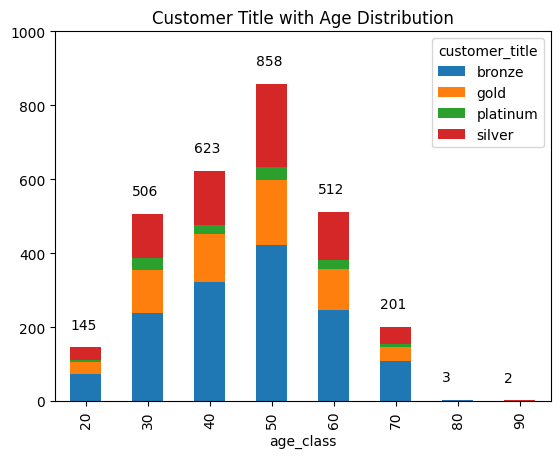

In [ ]:
df_merge.groupby('age_class')['customer_title'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)

for i, v in enumerate(df_merge.groupby('age_class') \
                      .agg({'customer_title': lambda x: len(x)})['customer_title']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Customer Title with Age Distribution')
plt.show()

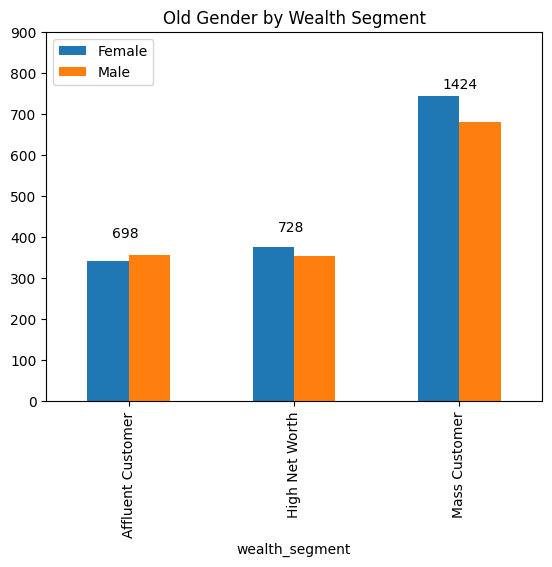

In [ ]:
df_merge.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)


for i, v in enumerate(df_merge.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

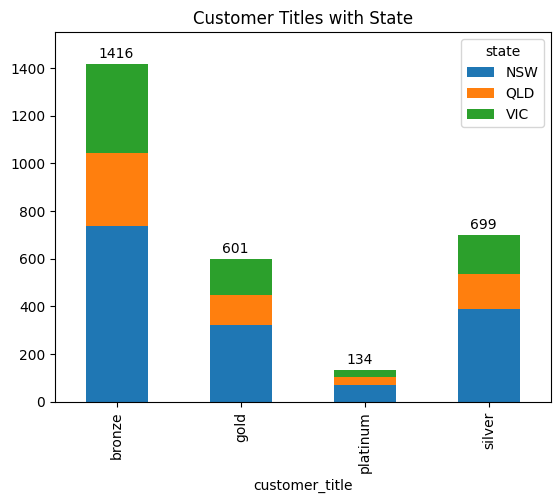

In [ ]:
df_merge.groupby('customer_title')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)


for i, v in enumerate(df_merge.groupby('customer_title') \
                      .agg({'state': lambda x: len(x)})['state']):
    plt.text(i - .15, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1550])
plt.title('Customer Titles with State')
plt.show()

Text(0, 0.5, '')

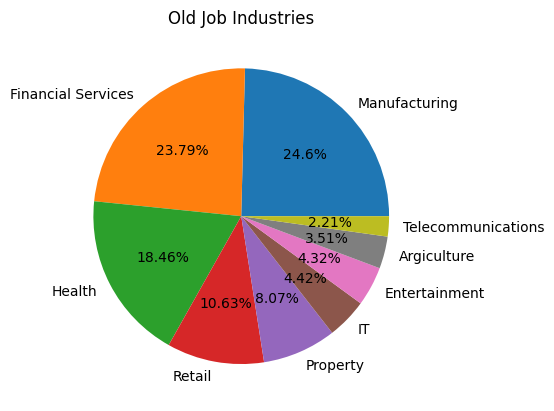

In [ ]:
df_merge['job_industry_category'].value_counts().plot.pie(
    autopct=lambda pct: str(round(pct, 2)) + '%'
)
plt.title('Old Job Industries')
plt.ylabel('')

In [ ]:
cust = df_merge.groupby('customer_title').agg({
    'age': lambda x: len(x)
})
cust.rename(columns={'age': 'count'}, inplace=True)
cust['count'] = cust['count'].astype(int)
cust = cust.sort_values('count')
cust

,count
customer_title,
platinum,134
gold,601
silver,699
bronze,1416


In [ ]:
cust = df_merge.groupby(['state', 'customer_title']).agg({'age': lambda x: len(x)})

cust.rename(columns={'age': 'count'}, inplace=True)
cust['count'] = cust['count'].astype(int)
cust

count
state customer_title       
NSW   bronze            738
      gold              323
      platinum           70
      silver            389
QLD   bronze            305
      gold              126
      platinum           33
      silver            146
VIC   bronze            373
      gold              152
      platinum           31
      silver            164

# New Customer List

In [ ]:
df_new_cust = pd.read_excel(path, sheet_name='NewCustomerList')
df_new_cust.head()

<ipython-input-63-1ea971ef327d>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_new_cust = pd.read_excel(path, sheet_name='NewCustomerList')


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.67,0.6700,0.837500,0.711875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.09,1.0900,1.090000,1.090000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.89,1.1125,1.112500,1.112500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.81,0.8100,1.012500,1.012500,4,4,1.703125


In [ ]:
df_new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [ ]:
df_new_cust.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [ ]:
df_new_cust.duplicated().sum()

0

In [ ]:
df_new_cust.shape

(1000, 23)

In [ ]:
df_new_cust.dropna(inplace=True)
df_new_cust

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.67,0.6700,0.837500,0.711875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.09,1.0900,1.090000,1.090000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.89,1.1125,1.112500,1.112500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.81,0.8100,1.012500,1.012500,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.53,0.5300,0.530000,0.530000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.87,0.8700,1.087500,0.924375,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.54,0.6750,0.675000,0.675000,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.85,1.0625,1.062500,0.903125,997,997,0.357000


In [ ]:
df_new_cust['age'] = (dt.datetime.now() - df_new_cust['DOB']) / np.timedelta64(1, 'Y')
df_new_cust['age_class'] = ((round(df_new_cust['age'] / 10)) *10).astype(int)
df_new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_class
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750,65.930493,70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,11,0.67,0.6700,0.837500,0.711875,1,1,1.718750,53.237556,50
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5,1.09,1.0900,1.090000,1.090000,1,1,1.718750,48.802147,50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1,0.89,1.1125,1.112500,1.112500,4,4,1.703125,44.383165,40
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,9,0.81,0.8100,1.012500,1.012500,4,4,1.703125,57.735937,60


Text(0, 0.5, '')

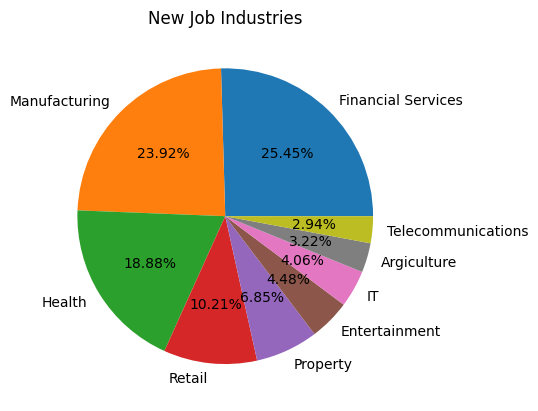

In [ ]:
df_new_cust.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('New Job Industries')
plt.ylabel('')

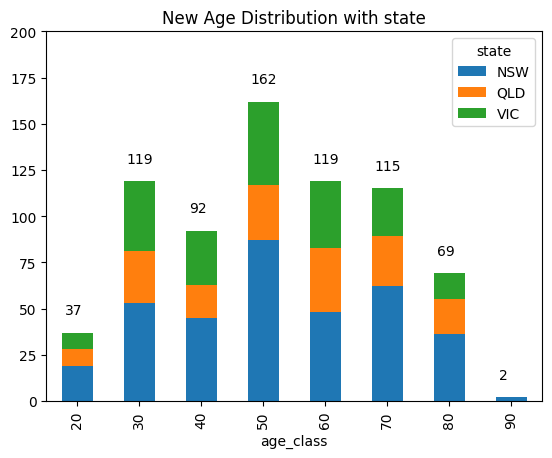

In [ ]:
df_new_cust.groupby('age_class')['state'].value_counts().unstack(level=1).plot.bar(stacked=True)

for i, v in enumerate(df_new_cust.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
  plt.text(i-.2, v+ 10, int(v), color='black')

axes= plt.gca()
axes.set_ylim([0,200])
plt.title('New Age Distribution with state')
plt.show()

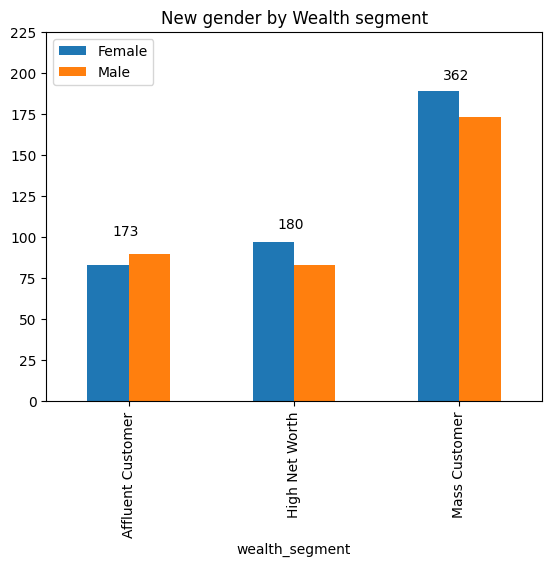

In [ ]:
df_new_cust.groupby('wealth_segment')['gender'].value_counts().unstack(level=1).plot.bar(stacked=False)

for i,v in enumerate(df_new_cust.groupby('wealth_segment').agg(
    {'gender': lambda x: len(x)})['gender']):
  plt.text(i- .1, v//2+15, int(v), color='black')

axes= plt.gca()
axes.set_ylim([0, 225])
plt.title('New gender by Wealth segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

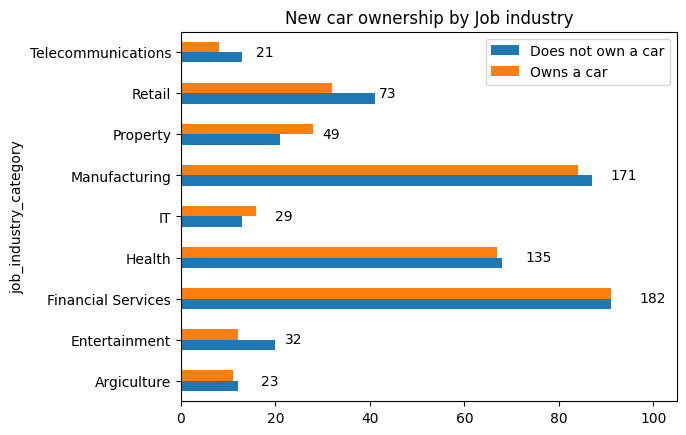

In [ ]:
df_new_cust.groupby('job_industry_category')['owns_car'].value_counts().unstack(level=1).plot.barh(stacked=False)

for i ,v in enumerate(df_new_cust.groupby('job_industry_category').agg({'owns_car': lambda x: len(x)})['owns_car']):
  plt.text(v//2+ 6, i- 0.1, int(v), color='black')

axes= plt.gca()
axes.set_xlim([0, 105])
plt.title('New car ownership by Job industry')
plt.legend(['Does not own a car', 'Owns a car'], loc='upper right')
plt.show()

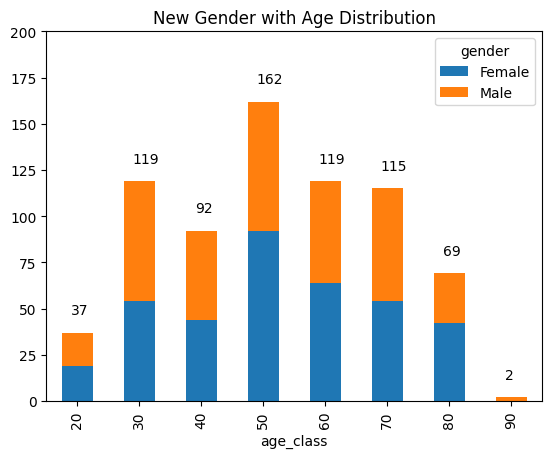

In [ ]:
df_new_cust.groupby('age_class')['gender'].value_counts().unstack(level=1).plot.bar(stacked=True)

for i,v in enumerate(df_new_cust.groupby('age_class').agg({'gender': lambda x: len(x)})['gender']):
  plt.text(i- .1, v+10, int(v), color='black')

axes = plt.gca()
axes.set_ylim([0, 200])
plt.title('New Gender with Age Distribution')
plt.show()

In [ ]:
df_merge['customer_title'] = df_merge['total_score'].map(
    {
        3: 'Platinum',
        4: 'Very Loyal',
        5: 'Becoming Loyal',
        6: 'Recent',
        7: 'Average',
        8: 'High Risk',
        9: 'Evasive',
        10: 'Losing',
        11: 'Inactive',
        12: 'Lost'
    }
)

df_merge

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,gender,...,wealth_segment,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5,Becoming Loyal,Female,...,Mass Customer,1,11.0,69.678635,70,060 Morning Avenue,2016,NSW,Australia,10
2,128.0,3,2226.26,4,4,2,442,10,Losing,Male,...,Mass Customer,1,16.0,42.499432,40,6 Meadow Vale Court,2153,NSW,Australia,10
4,195.0,2,220.57,4,4,4,444,12,Lost,Male,...,Mass Customer,0,7.0,61.703112,60,0 Holy Cross Court,4211,QLD,Australia,9
6,64.0,5,3946.55,3,2,3,323,8,High Risk,Male,...,High Net Worth,1,13.0,56.750238,60,9 Oakridge Court,3216,VIC,Australia,9
7,253.0,3,220.11,4,4,4,444,12,Lost,Female,...,Affluent Customer,1,11.0,47.312672,50,4 Delaware Trail,2210,NSW,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,256.0,4,2045.84,4,4,2,442,10,Losing,Male,...,Mass Customer,1,19.0,37.144086,40,2565 Caliangt Point,2171,NSW,Australia,9
3497,52.0,3,1648.32,3,4,4,344,11,Inactive,Female,...,Affluent Customer,1,18.0,37.122182,40,96 Delladonna Trail,3976,VIC,Australia,5
3498,127.0,6,3147.33,4,3,3,433,10,Losing,Female,...,Mass Customer,0,5.0,27.621645,30,3 Nova Point,3012,VIC,Australia,4


In [ ]:
df_merge.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,gender,...,wealth_segment,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5,Becoming Loyal,Female,...,Mass Customer,1,11.0,69.678635,70,060 Morning Avenue,2016,NSW,Australia,10
2,128.0,3,2226.26,4,4,2,442,10,Losing,Male,...,Mass Customer,1,16.0,42.499432,40,6 Meadow Vale Court,2153,NSW,Australia,10
4,195.0,2,220.57,4,4,4,444,12,Lost,Male,...,Mass Customer,0,7.0,61.703112,60,0 Holy Cross Court,4211,QLD,Australia,9
6,64.0,5,3946.55,3,2,3,323,8,High Risk,Male,...,High Net Worth,1,13.0,56.750238,60,9 Oakridge Court,3216,VIC,Australia,9
7,253.0,3,220.11,4,4,4,444,12,Lost,Female,...,Affluent Customer,1,11.0,47.312672,50,4 Delaware Trail,2210,NSW,Australia,9


In [ ]:
top_1000 = df_merge.sort_values('rfm_class').head(1000)
top_1000

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,gender,...,wealth_segment,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,,,,,,,,
973,8.0,8,6639.85,1,1,1,111,3,Platinum,Female,...,High Net Worth,0,15.0,43.873861,40,42 Dahle Parkway,3806,VIC,Australia,7
2391,12.0,10,5862.45,1,1,1,111,3,Platinum,Female,...,Mass Customer,0,14.0,62.152128,60,9501 Melby Avenue,4178,QLD,Australia,7
1000,0.0,9,5383.48,1,1,1,111,3,Platinum,Female,...,Mass Customer,0,11.0,44.859508,40,4757 Texas Trail,3136,VIC,Australia,9
2464,2.0,13,7817.10,1,1,1,111,3,Platinum,Male,...,Mass Customer,0,6.0,40.196852,40,3126 Butterfield Pass,2573,NSW,Australia,8
2476,14.0,14,7493.23,1,1,1,111,3,Platinum,Male,...,High Net Worth,0,17.0,66.724433,70,567 Scott Park,4118,QLD,Australia,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,34.0,5,3909.14,2,2,3,223,7,Average,Male,...,Mass Customer,1,19.0,61.421107,60,85 Northland Circle,2077,NSW,Australia,10
208,27.0,5,3342.02,2,2,3,223,7,Average,Male,...,High Net Worth,0,5.0,28.626457,30,056 Stone Corner Alley,4078,QLD,Australia,7
1697,24.0,5,3042.48,2,2,3,223,7,Average,Female,...,Mass Customer,1,12.0,54.217674,50,9037 Norway Maple Junction,2087,NSW,Australia,11


In [ ]:
# final_data = pd.ExcelWriter('kpmg_final_data.xlsx', engine='xlsxwriter')
# df_merge.to_excel(final_data, sheet_name='Dataset')
# top_1000.to_excel(final_data, sheet_name='Top 1000')

# final_data.save()
# final_data.close()